<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/R2/R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言

在迴歸問題中，<font color="#dddd00">判定係數(Coefficient of Determination) $R^2$ </font> 係用來衡量機器學習模型表現的指標之一，它代表從自變數 $X$ 可以解釋依變數 $Y$ 變異的比例，換句話說， $R^2$ 是用來評量模型解釋資料變異的能力表現。

# 數學定義   
$R^2$ 的定義如下:    

\begin{aligned}
R^2 &\equiv 1 - \frac{\text{Sum of Squares due to Error, SSE}}{\text{Total Sum of Squares, SST}} \\&= 1 - \frac{\displaystyle \sum_{i=1}^{k} (y_i-\hat y_i)^2}{\displaystyle \sum_{i=1}^{k} (y_i-\bar y)^2}  \in (-\infty, 1].
\end{aligned}  
  

# $R^2$ 的概念

- $R^2$ 為評估模型解釋資料變異的能力指標 :  
  - 判定係數 $R^2$ 越近似 $1$，表示模型解釋資料變異的能力越好。
  - <font color="#dddd00">判定係數 $R^2$ 越近似 $1$，不能表示模型的預測能力越好。</font>  
  
    <p align="left">
    <img width="500" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/R2/imgs/Overfitting.png">
    </p>  
    
    圖片來源 : [https://allmodelsarewrong.github.io/overfit.html](https://allmodelsarewrong.github.io/overfit.html)

# $R^2$ 的解讀

$R^2$ 的值域區間為 $(-\infty, 1]$。     
- 若我們使用線性迴歸模型，則 $R^2 \in [0, 1]$；  
- 若我們使用機器學習模型，例如 : 樹模型、集成模型等，則 $R^2 \in (-\infty, 1]$ :  
  - 若 $R^2 < 0$，表示此機器學習模型的解釋能力不佳，不如用平均值來解釋資料的變異。  
  - 若 $R^2 = -\infty$，則有下列兩種可能的情況須確認 :  
    (i) 目標變數的數據可能為常數，須確認資料的正確性與合理性；   
    (ii) 若資料正確且合理無誤，代表我們選用的機器學習模型，完全無法解釋資料的變異，建議嘗試其他的機器學習模型。   

    <p align="left">
    <img width="700" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/R2/imgs/Example_of_r2.png">
    </p>  

    

# Python 範例  

當模型訓練完成後，我們可使用 [sklearn.metrics.r2_score(y_true, y_pred)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn-metrics-r2-score) 函數，來計算模型的判定係數 $R^2$，以評估模型解釋資料變異的能力。

In [1]:
# 匯入套件
import sys

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn
from sklearn.metrics import r2_score

print('Python version:', sys.version[0:7])
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Sklearn version:', sklearn.__version__)

Python version: 3.10.12
NumPy version: 1.23.5
Pandas version: 1.5.3
Matplotlib version: 3.7.1
Sklearn version: 1.2.2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:624: RuntimeWarning: divide by zero encountered in divide
  output_scores = 1 - (numerator / denominator)


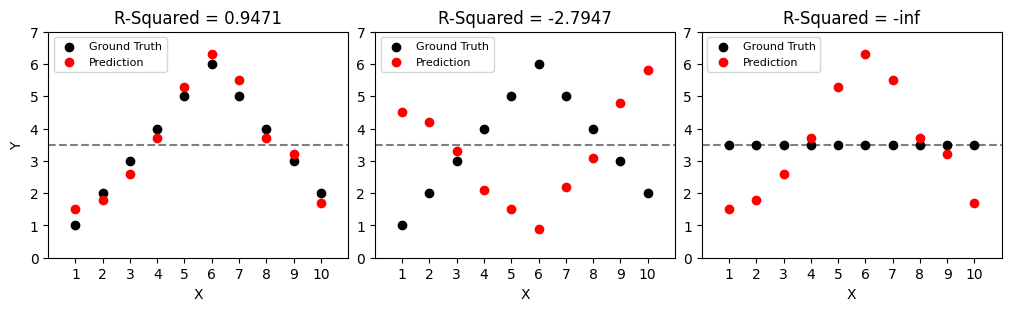

In [2]:
# 範例 : R^2 正負數的可能情境
x = range(1, 11)
y_true = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2]

fig = plt.figure(figsize=(10, 3), constrained_layout=True)
gs = gridspec.GridSpec(1, 3, figure=fig)

# R^2 > 0
ax1 = fig.add_subplot(gs[0, 0])
y_pred = [1.5, 1.8, 2.6, 3.7, 5.3, 6.3, 5.5, 3.7, 3.2, 1.7]
r2 = r2_score(y_true, y_pred)

ax1.axhline(y=np.mean(y_true), color='black', linestyle='--', alpha=0.5)
ax1.scatter(x, y_true, color='black', label='Ground Truth')
ax1.scatter(x, y_pred, color='red', label='Prediction')
ax1.set_ylim([0, 7])
ax1.set_xlim([0, 11])
ax1.set_xticks(x)
ax1.legend(loc=2, fontsize=8)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('R-Squared = '+ str(round(r2, 4)), fontsize=12)

# R^2 < 0
ax2 = fig.add_subplot(gs[0, 1])
y_pred = [4.5, 4.2, 3.3, 2.1, 1.5, 0.9, 2.2, 3.1, 4.8, 5.8]
r2 = r2_score(y_true, y_pred)

ax2.axhline(y=np.mean(y_true), color='black', linestyle='--', alpha=0.5)
ax2.scatter(x, y_true, color='black', label='Ground Truth')
ax2.scatter(x, y_pred, color='red', label='Prediction')
ax2.set_ylim([0, 7])
ax2.set_xlim([0, 11])
ax2.set_xticks(x)
ax2.legend(loc=2, fontsize=8)
ax2.set_xlabel('X')
ax2.set_title('R-Squared = '+ str(round(r2, 4)), fontsize=12)

# R^2 = -inf
ax3 = fig.add_subplot(gs[0, 2])
y_true = [np.mean(y_true)] * 10
y_pred = [1.5, 1.8, 2.6, 3.7, 5.3, 6.3, 5.5, 3.7, 3.2, 1.7]
r2 = r2_score(y_true, y_pred, force_finite=False)

ax3.axhline(y=np.mean(y_true), color='black', linestyle='--', alpha=0.5)
ax3.scatter(x, y_true, color='black', label='Ground Truth')
ax3.scatter(x, y_pred , color='red', label='Prediction')
ax3.set_ylim([0, 7])
ax3.set_xlim([0, 11])
ax3.set_xticks(x)
ax3.legend(loc=2, fontsize=8)
ax3.set_xlabel('X')
ax3.set_title('R-Squared = '+ str(round(r2, 4)), fontsize=12)

plt.show()